# Comp1800 Coursework Data Exploration Notebook

### Import libraries to be used in to expoler this data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import hvplot.pandas
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import cm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# path variable to save plots too

In [3]:
PATH = "/home/michael/DataSciMSc/comp1800-DataVis/coursework/images"

### Assign CSV files to varaibles 

In [4]:
data = pd.read_csv("https://tinyurl.com/ChrisCoDV/001002629/DailyCustomers.csv", index_col = 0)
data.index = pd.to_datetime(data.index)
store_marketing = pd.read_csv("https://tinyurl.com/ChrisCoDV/001002629/StoreMarketing.csv", index_col = 0)
store_overheads = pd.read_csv("https://tinyurl.com/ChrisCoDV/001002629/StoreOverheads.csv", index_col = 0)
store_size = pd.read_csv("https://tinyurl.com/ChrisCoDV/001002629/StoreSize.csv", index_col = 0)
store_staff = pd.read_csv("https://tinyurl.com/ChrisCoDV/001002629/StoreStaff.csv", index_col = 0)

### Check data has loaded

In [5]:
print("Daily Customers",data.head())
print("\nStore Marketing",store_marketing.head())
print("\nStore Overheads",store_overheads.head())
print("\nStore Size", store_size.head())
print("\nStore Staff",store_staff.head())

Daily Customers             RGS   RAH  TAP  DTJ  VYZ  NGB  TSE  DZT  ENY  NMO  ...  XML  XSV  \
Date                                                           ...             
2019-01-01  558  1168   79   69   62    0   84   50   80    0  ...   84   97   
2019-01-02  576  1082   79   64   69    0   91   31   92    0  ...   69   73   
2019-01-03  481   960   78   58   63    0   82   70   89    0  ...   65   66   
2019-01-04  396   953   72   65   70    0   85   50   90    0  ...   74   74   
2019-01-05  380   893   82   67   61    0   79   76   97    0  ...   84   76   

            AEI  WMB  CFG   SGA  ZMS  MUY   QSN  UMU  
Date                                                  
2019-01-01    0   84   74  1060   53  411   900   82  
2019-01-02    0  106   63  1144   61  291  1034   71  
2019-01-03    0   89   76   969   59  313   974   68  
2019-01-04    0   90   74   908   59  311   721   64  
2019-01-05    0   84   68   848   52  269   671   69  

[5 rows x 40 columns]

Store Marketin

### Create a dataframe for the summary of the data

In [6]:
summary_data = pd.DataFrame(index=data.columns)
summary_data['Staff'] = store_staff.values
summary_data['Total Customers'] = data.sum().values # total customer visits 
summary_data['Size'] = store_size.values
summary_data['Overheads'] = store_overheads.values
summary_data['Marketing'] = store_marketing.values

In [7]:
print(summary_data.head())

     Staff  Total Customers  Size  Overheads  Marketing
RGS     12           183484  1597      92000      19000
RAH     41           390690  4601      26000      38000
TAP      6            29012   422      93000       4000
DTJ      4            24414   309      16000       3000
VYZ      3            24650   335      38000       3000


### Create bar chart for all data on total number of visits for each store

RAH    390690
SGA    365618
SMM    333848
QSN    313958
PAA    193305
RGS    183484
QMD    164844
OSG    154677
NAQ    154051
PGL    146568
OMV    134055
MUY    112536
EFN     33692
ENY     32847
WYG     32300
dtype: int64


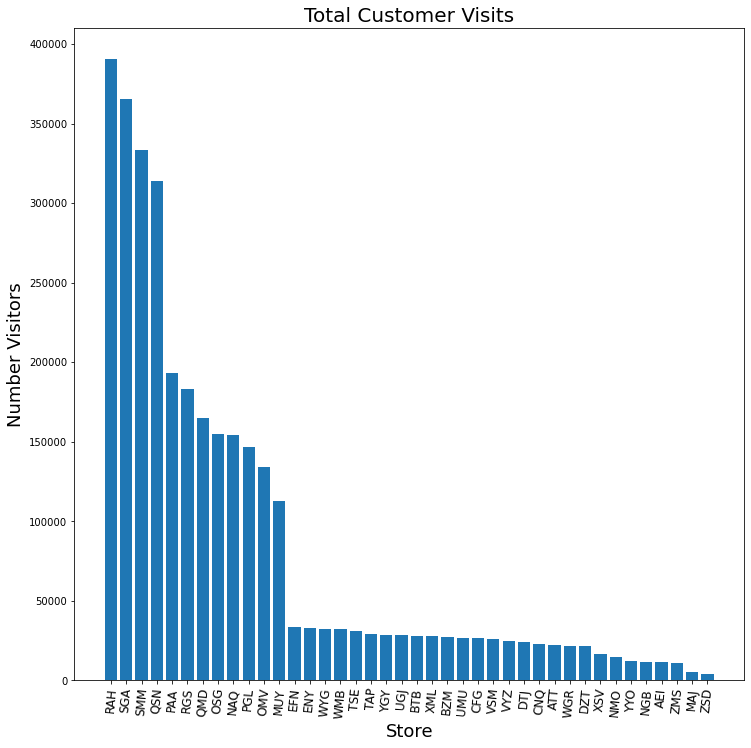

In [8]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)
print(data.sum().head(15))
plt.figure(figsize=(12, 12))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.sum(), align='center')
plt.xticks(x_pos, data.columns, rotation=85, fontsize=12)
plt.xlabel('Store', fontsize=18)
plt.ylabel('Number Visitors', fontsize=18)
plt.title('Total Customer Visits', fontsize=20)
plt.savefig('%s/total_visitors_bar.png'%(PATH), transparent=True,bbox_inches='tight') 
plt.show()


### Categorise stores into 3 categories split by total volume of customer visits

In [9]:
categories = ['High', 'Medium', 'Low']
categories_selected = [[] for i in range(len(categories))]
for name in data.columns:
    total_visitors = data[name].sum()
    if total_visitors > 200000:
        category = 0
    elif total_visitors > 50000:
        category = 1
    else:
        category = 2
    categories_selected[category].append(name)
    print('Page ' + name + ' is ' + categories[category] + ' volume')

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))



Page RAH is High volume
Page SGA is High volume
Page SMM is High volume
Page QSN is High volume
Page PAA is Medium volume
Page RGS is Medium volume
Page QMD is Medium volume
Page OSG is Medium volume
Page NAQ is Medium volume
Page PGL is Medium volume
Page OMV is Medium volume
Page MUY is Medium volume
Page EFN is Low volume
Page ENY is Low volume
Page WYG is Low volume
Page WMB is Low volume
Page TSE is Low volume
Page TAP is Low volume
Page YGY is Low volume
Page UGJ is Low volume
Page BTB is Low volume
Page XML is Low volume
Page BZM is Low volume
Page UMU is Low volume
Page CFG is Low volume
Page VSM is Low volume
Page VYZ is Low volume
Page DTJ is Low volume
Page CNQ is Low volume
Page ATT is Low volume
Page WGR is Low volume
Page DZT is Low volume
Page XSV is Low volume
Page NMO is Low volume
Page YYO is Low volume
Page NGB is Low volume
Page AEI is Low volume
Page ZMS is Low volume
Page MAJ is Low volume
Page ZSD is Low volume
High: ['RAH', 'SGA', 'SMM', 'QSN']
Medium: ['PAA', '

### Create lists from the information gathered from the previous cell

In [10]:
high_volume = ['RAH', 'SGA', 'SMM', 'QSN']
medium_volume = ['PAA', 'RGS', 'QMD', 'OSG', 'NAQ', 'PGL', 'OMV', 'MUY']
low_volume =  ['EFN', 'ENY', 'WYG', 'WMB', 'TSE', 'TAP', 'YGY', 'UGJ', 'BTB', 'XML', 'BZM', 'UMU', 'CFG', 'VSM', 'VYZ', 'DTJ', 'CNQ', 'ATT', 'WGR', 'DZT', 'XSV', 'NMO', 'YYO', 'NGB', 'AEI', 'ZMS', 'MAJ', 'ZSD']

### Define a function that can draw time series graphs with or without rolling average data and trendlines

In [11]:
def displayFigure(Data, figX, FigY, linewidth1, 
                  xlabel, ylabel, title, showLegend = False,
                 showRollingData = False, rollingData = 0,
                  linewidth2 = 0, legend = [], showTrendLine= False,
                  save_plot = False, path = PATH, file_name = ""):
    
    plt.figure(figsize=(figX, FigY))
    plt.plot(Data, linewidth=linewidth1)
    
    """
    if block to display a rolling average 
    - inputs 
        showRollingData = Boolen
        rollingData = List
        linewidth = int 
    
    - outputs
        plot of average for data over time
    """
    if(showRollingData == True):
        plt.gca().set_prop_cycle(None) # reset colours
        plt.plot(rollingData, linewidth=linewidth2)
        
    """
    if block to add trend line
    - inputs
        showTrendLine = Boolen
        selected = list
    - outputs
        trend plot using selected data
    """
    if(showTrendLine == True):
        plt.gca().set_prop_cycle(None) # reset colours
        for name in legend:
            x = np.arange(len(data[name]))
            z = np.polyfit(x, data[name], 1)
            trend = np.poly1d(z)
            plt.plot(data.index, trend(x), linestyle='--')
            
            
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(title, fontsize=20)
    if(showLegend == True):
        plt.legend(legend, loc=2)
        
    if(save_plot== True):
        plt.savefig('%s/%s.png'%(path,file_name), transparent=True, bbox_inches='tight')  
    plt.show()

In [12]:
period = 14 # variable used to specify the number of days
rolling_average = data.rolling(window=period).mean() # using the rolling average 

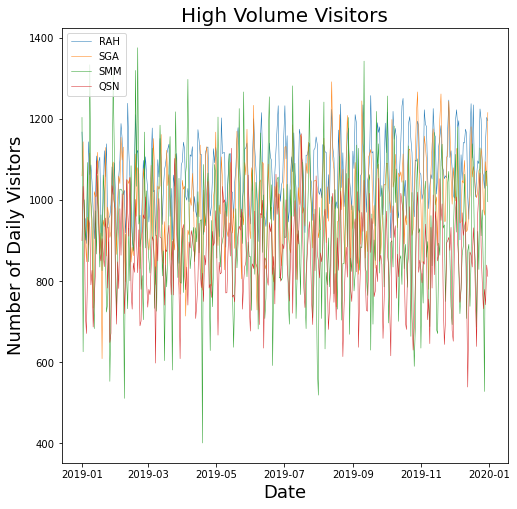

In [13]:
displayFigure(data[high_volume], # Data
              8, # fig size X
              8, # fig size Z
              0.5, # linewidth
              "Date", # xlabel
              "Number of Daily Visitors", # y label
              "High Volume Visitors", # Title
              legend = high_volume,
              showLegend = True) # Display legend

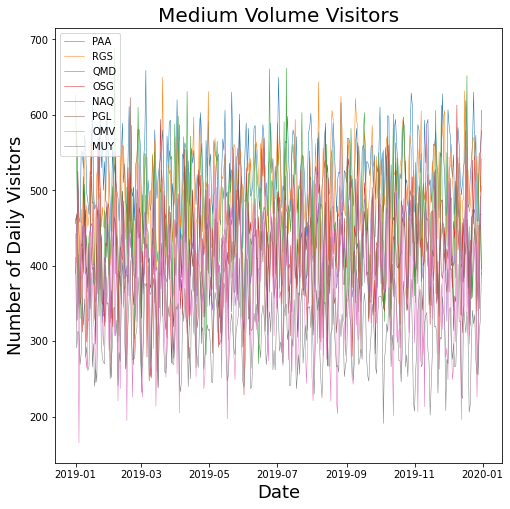

In [14]:
displayFigure(data[medium_volume], # Data
              8, # fig size X
              8, # fig size Z
              0.5, # linewidth
              "Date", # xlabel
              "Number of Daily Visitors", # y label
              "Medium Volume Visitors", # Title
              legend = medium_volume,
              showLegend = True) # Display legend

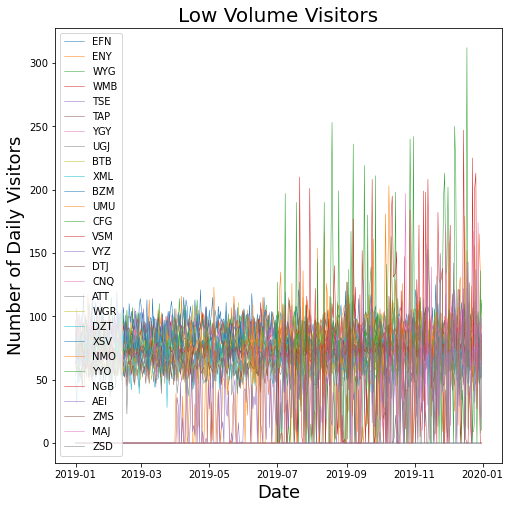

In [15]:
displayFigure(data[low_volume], # Data
              8, # fig size X
              8, # fig size Z
              0.5, # linewidth
              "Date", # xlabel
              "Number of Daily Visitors", # y label
              "Low Volume Visitors", # Title
              legend = low_volume,
              showLegend = True) # Display legend

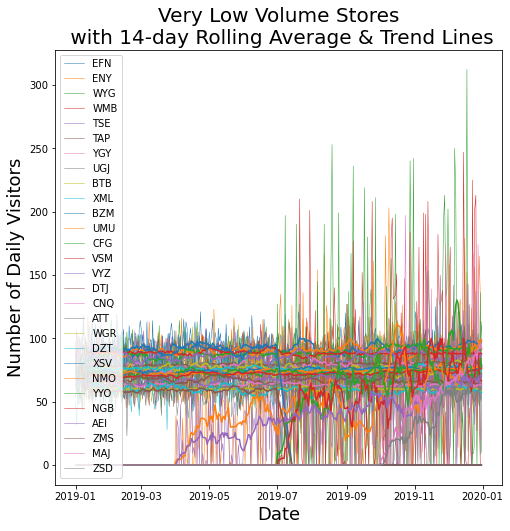

In [16]:
displayFigure(data[low_volume], # Data
              8, # fig size X
              8, # fig size Z
              0.5, # linewidth
              "Date", # xlabel
              "Number of Daily Visitors", # y label
              "Very Low Volume Stores\n with 14-day Rolling Average & Trend Lines", # Title
              legend = low_volume,
              showLegend = True, # Display legend
              showRollingData = True, # Display Rolling average data
              rollingData = rolling_average[low_volume], # Rolling average data
              linewidth2 = 1.5,# linewidth for rolling average 
              showTrendLine = False) # Show trendline

intresting data here with the very low customer count, warrents further investigation and tidy up

In [17]:
# use interactive plot to identify stores that have opened and closed
plot = data[low_volume].hvplot.line(
    frame_height = 500, frame_width = 500,
    xlabel = 'Date', ylabel = 'Visitors',
    title = 'Very Low Volume Stores'
)
hvplot.show(plot)

Launching server at http://localhost:44547


In [18]:
intrest = ['XSV', 'NMO', 'YYO', 'NGB', 'AEI', 'ZMS', 'MAJ' ,'ZSD']

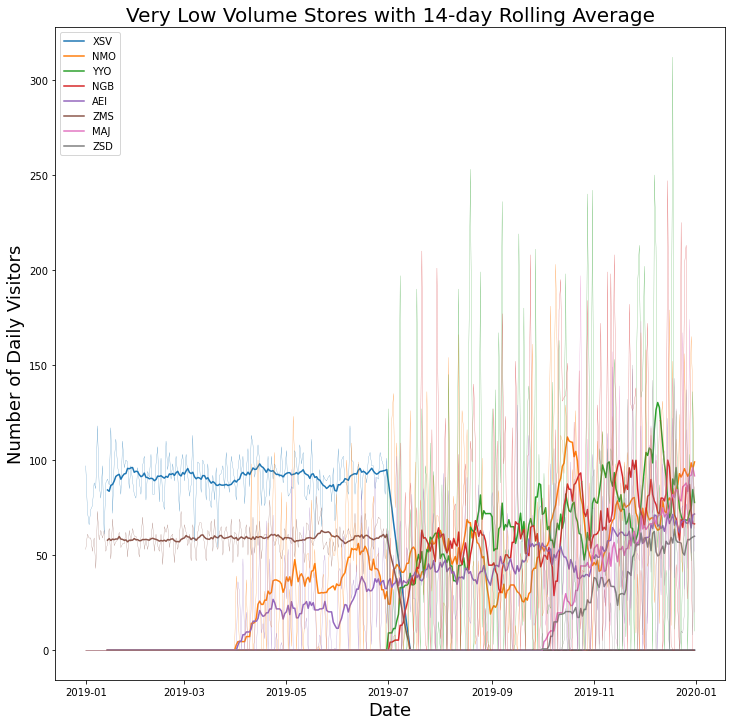

In [19]:
"""
By swapping the rolling average data and the selected data variables, we are able to 
make the legend clearer with thicker lines displaying for each column.
"""
displayFigure(rolling_average[intrest], # Display Rolling average data
              12, # fig size X
              12, # fig size Z
              1.5, # linewidth
              "Date", # xlabel
              "Number of Daily Visitors", # y label
              "Very Low Volume Stores with 14-day Rolling Average", # Title
              legend = intrest,
              showLegend = True, # Display legend
              showRollingData = True, # data
              rollingData = data[intrest], # Rolling average data
              linewidth2 = 0.2,# linewidth for rolling average 
              showTrendLine = False,
              save_plot = True,
              file_name = "store_visit_line_intrest") 

plot above is too messy with trend lines also displayed 

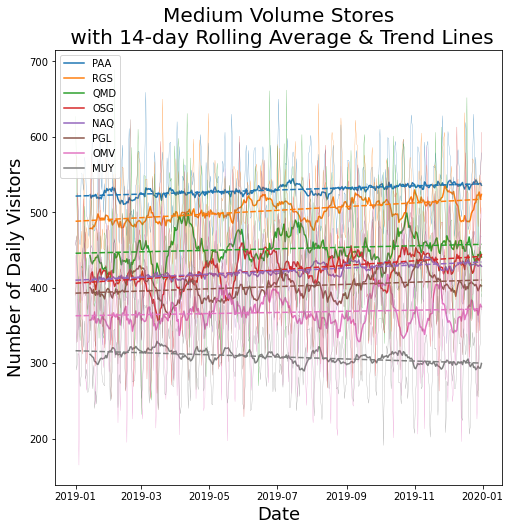

In [20]:
displayFigure(rolling_average[medium_volume], # Data
              8, # fig size X
              8, # fig size Z
              1.5, # linewidth
              "Date", # xlabel
              "Number of Daily Visitors", # y label
              "Medium Volume Stores\n with 14-day Rolling Average & Trend Lines", # Title
              legend = medium_volume,
              showLegend = True, # Display legend
              showRollingData = True, # Display Rolling average data
              rollingData = data[medium_volume], # Rolling average data
              linewidth2 = 0.2,# linewidth for rolling average 
              showTrendLine = True) # Show trendline

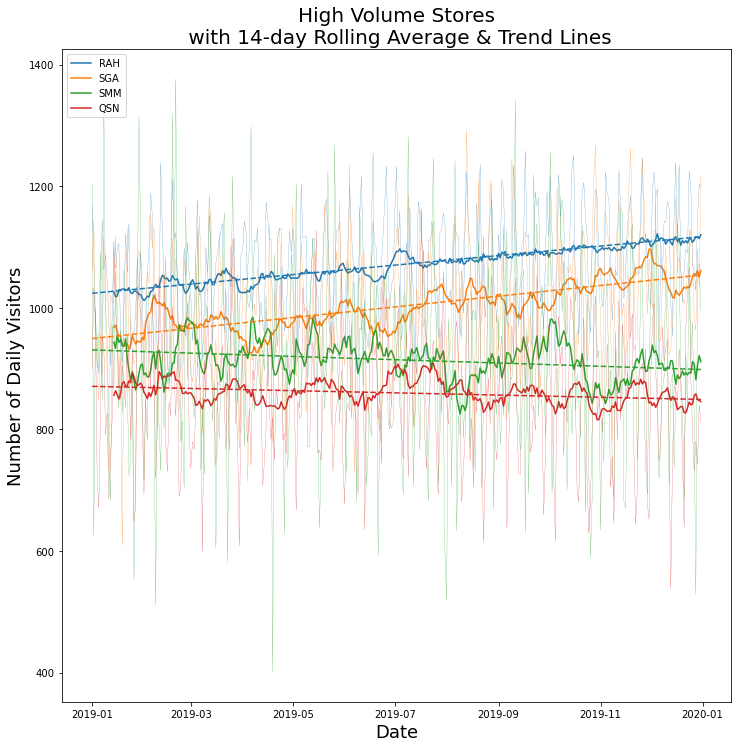

In [21]:
displayFigure(rolling_average[high_volume], # Data
              12, # fig size X
              12, # fig size Z
              1.5, # linewidth
              "Date", # xlabel
              "Number of Daily Visitors", # y label
              "High Volume Stores\n with 14-day Rolling Average & Trend Lines", # Title
              legend = high_volume,
              showLegend = True, # Display legend
              showRollingData = True, # Display Rolling average data
              rollingData = data[high_volume], # Rolling average data
              linewidth2 = 0.2,# linewidth for rolling average 
              showTrendLine = True,
              save_plot = True,
              file_name = "high_vol_line_trend_RA") # Show trendline

interactive chart for very low volume to gather the exact dates of possible store closures and openings

<function matplotlib.pyplot.show(close=None, block=None)>

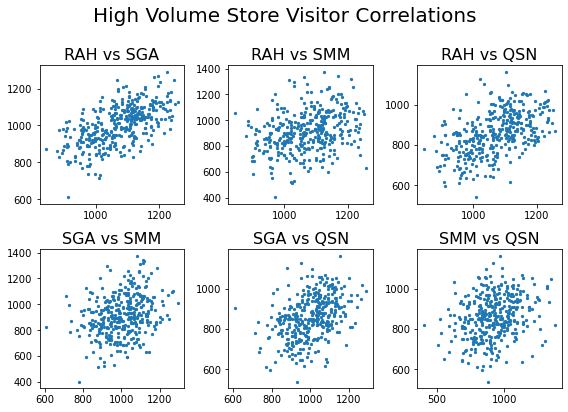

In [22]:
selected = high_volume
counter = 1
fig = plt.figure(figsize=(8,8))
fig.suptitle('High Volume Store Visitor Correlations', fontsize=20, position=(0.5,1.0))
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(3,3,counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=16)
        sub.scatter(data[name_i], data[name_j], s=5)
        counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show

In [23]:
# line sub plot function 
def linesub(data, selected, subx, suby, store_category, file_name = "", save_plot = False):
    counter = 1
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle(store_category + ' Daily Store Visitors', fontsize=20, position=(0.5, 1.0))
    for name in selected:
        sub = fig.add_subplot(subx, suby, counter)
        sub.set_title('Store ' + name, fontsize=10)
        sub.plot(data.index, data[name], linewidth=0.5)
        sub.axes.get_xaxis().set_ticks([])  # remove the x ticks
        counter += 1
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    if(save_plot== True):
        plt.savefig('%s/%s.png'%(path,file_name), transparent=True, bbox_inches='tight') 
    plt.show()

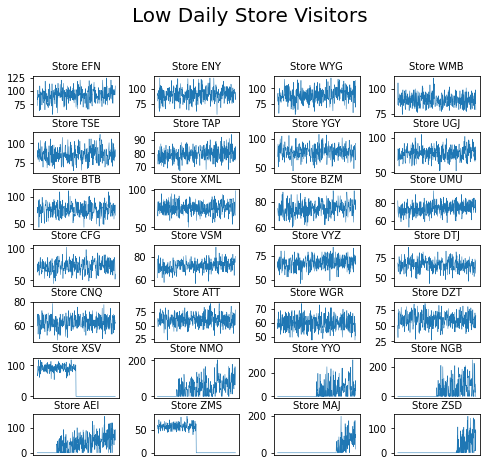

In [24]:
linesub(data, low_volume, 8,4, "Low")

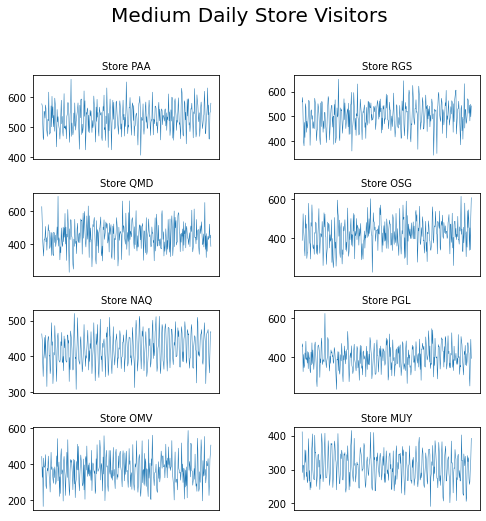

In [25]:
linesub(data, medium_volume, 4, 2, "Medium")

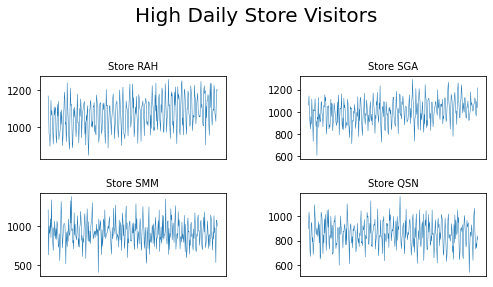

In [26]:
linesub(data, high_volume, 4, 2, "High")

### Auto correlation

In [27]:
def auto_correlation(data, selected):
    for name in selected:
        pd.plotting.autocorrelation_plot(data[name])
        #plt.xlim([0, 50]) # uncomment this line to zoom in
        plt.title('Store ' + name)
        plt.show()
        
            

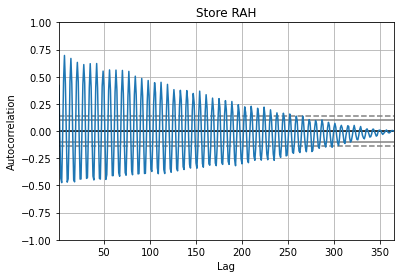

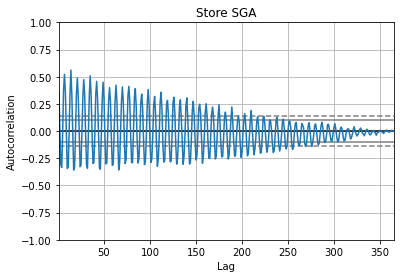

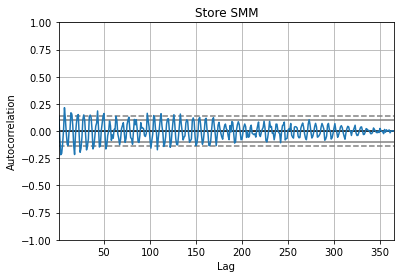

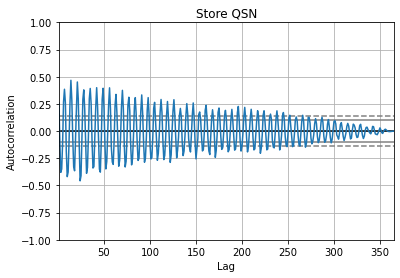

In [28]:
auto_correlation(data, high_volume)

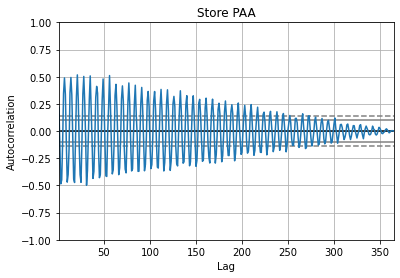

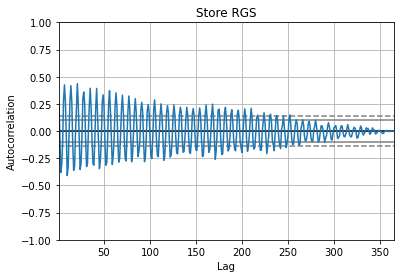

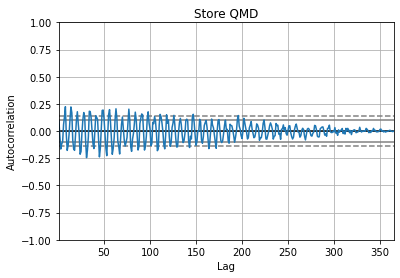

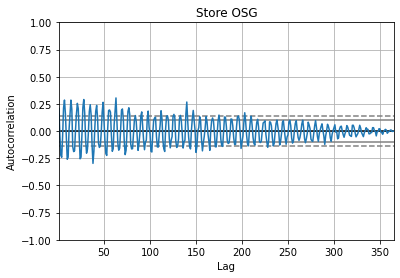

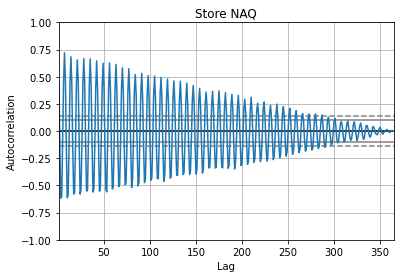

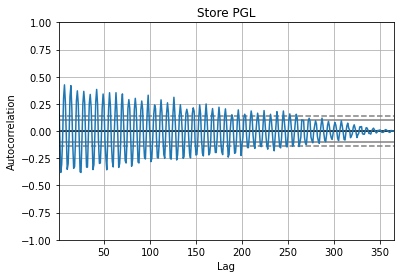

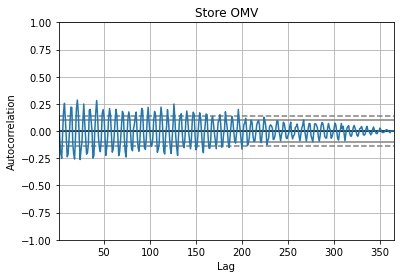

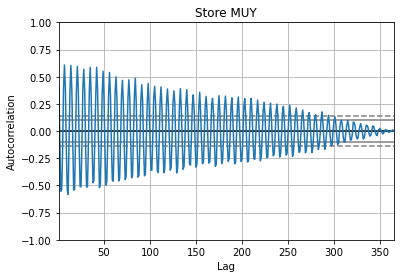

In [29]:
auto_correlation(data, medium_volume)

### Summary data exploration Initial visualisation showing bar chart subplots for all metrics

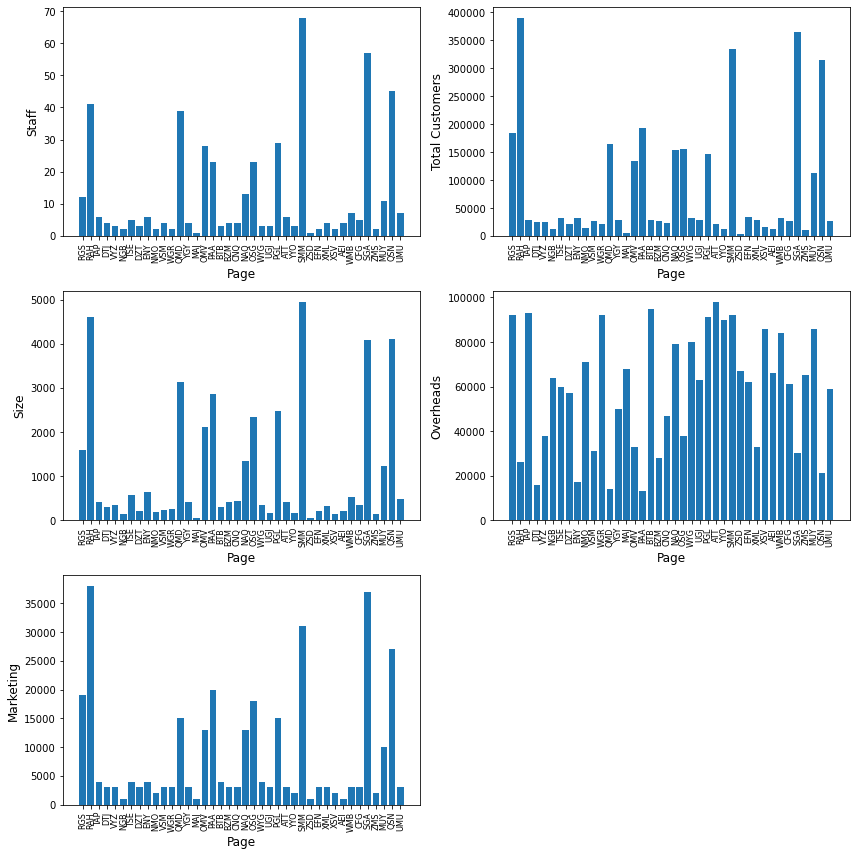

In [30]:
plt.figure(figsize=(12, 12))
counter = 1
x_pos = np.arange(len(summary_data.index))
for attribute in summary_data:
    sub = plt.subplot(3, 2, counter)
    sub.bar(x_pos, summary_data[attribute], align='center')
    sub.set_xticks([])
    sub.set_xticks(x_pos)
    sub.set_xticklabels(summary_data.index, rotation = 90, fontsize = 8)
    sub.set_xlabel('Page', fontsize=12)
    sub.set_ylabel(attribute, fontsize=12)
    counter += 1
plt.tight_layout()
plt.show()

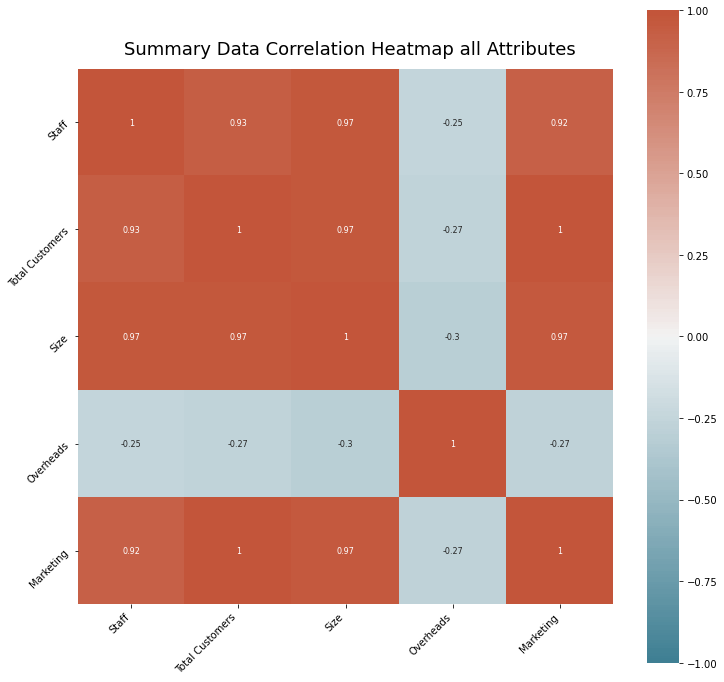

In [31]:
combined = high_volume + medium_volume
plt.figure(figsize=(12, 12))
plt.gcf().text(.44, .835, 
               "Summary Data Correlation Heatmap all Attributes", 
               fontsize = 18, color='Black' ,ha='center', va='center')
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('%s/heatmap.png'%(PATH), transparent=True,bbox_inches='tight') 
plt.show()

### radar plots 

In [51]:
normalised_data = summary_data / summary_data.max()
print(normalised_data)

        Staff  Total Customers      Size  Overheads  Marketing
RGS  0.176471         0.469641  0.322691   0.938776   0.500000
RAH  0.602941         1.000000  0.929683   0.265306   1.000000
TAP  0.088235         0.074258  0.085270   0.948980   0.105263
DTJ  0.058824         0.062489  0.062437   0.163265   0.078947
VYZ  0.044118         0.063094  0.067690   0.387755   0.078947
NGB  0.029412         0.029737  0.028693   0.653061   0.026316
TSE  0.073529         0.079879  0.113760   0.612245   0.105263
DZT  0.044118         0.055548  0.043645   0.581633   0.078947
ENY  0.088235         0.084074  0.130127   0.173469   0.105263
NMO  0.029412         0.037518  0.036371   0.724490   0.052632
VSM  0.058824         0.067391  0.047888   0.316327   0.078947
WGR  0.029412         0.055988  0.050111   0.938776   0.078947
QMD  0.573529         0.421930  0.632047   0.142857   0.394737
YGY  0.058824         0.072441  0.081229   0.510204   0.078947
MAJ  0.014706         0.013681  0.008689   0.693878   0

In [46]:
def radarPlot(normalised_data, 
              selected, 
              subplot_x, 
              subplot_y,
              radar_title, 
              filename,
              save_fig = False):
    n_attributes = len(normalised_data.columns)
    angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
    #plt.figure(figsize=(12, 12))
    fig = plt.figure(figsize=(12, 12))
    fig.suptitle(radar_title, fontsize=16)
    counter = 1
    for name in selected:
        values = normalised_data.loc[[name]].values.flatten().tolist()
        values += values[:1]
        sub = plt.subplot(subplot_x, subplot_y, counter, polar=True)
        sub.plot(angles, values)
        sub.fill(angles, values, alpha=0.1)
        sub.set_ylim(ymax=1.05)
        sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        sub.set_xticks(angles[0:-1])
        sub.set_xticklabels(normalised_data.columns, fontsize=8)
        sub.set_title('Store ' + name, fontsize=12, loc='left')
        counter += 1
    plt.tight_layout()
    if save_fig==True: 
        plt.savefig('%s/%s.png'%(PATH,filename), 
                    transparent=True,
                    bbox_inches='tight')
    plt.show()

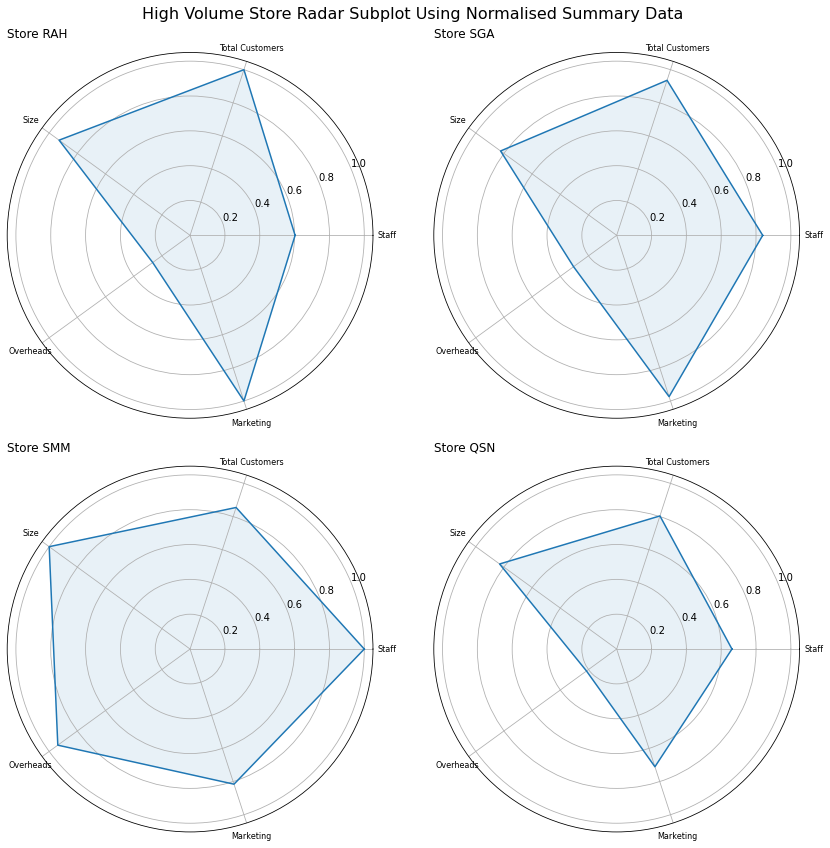

In [52]:
radarPlot(normalised_data, high_volume, 2, 2, 
          "High Volume Store Radar Subplot Using Normalised Summary Data",
         "highVolRadarPlot", save_fig = False)

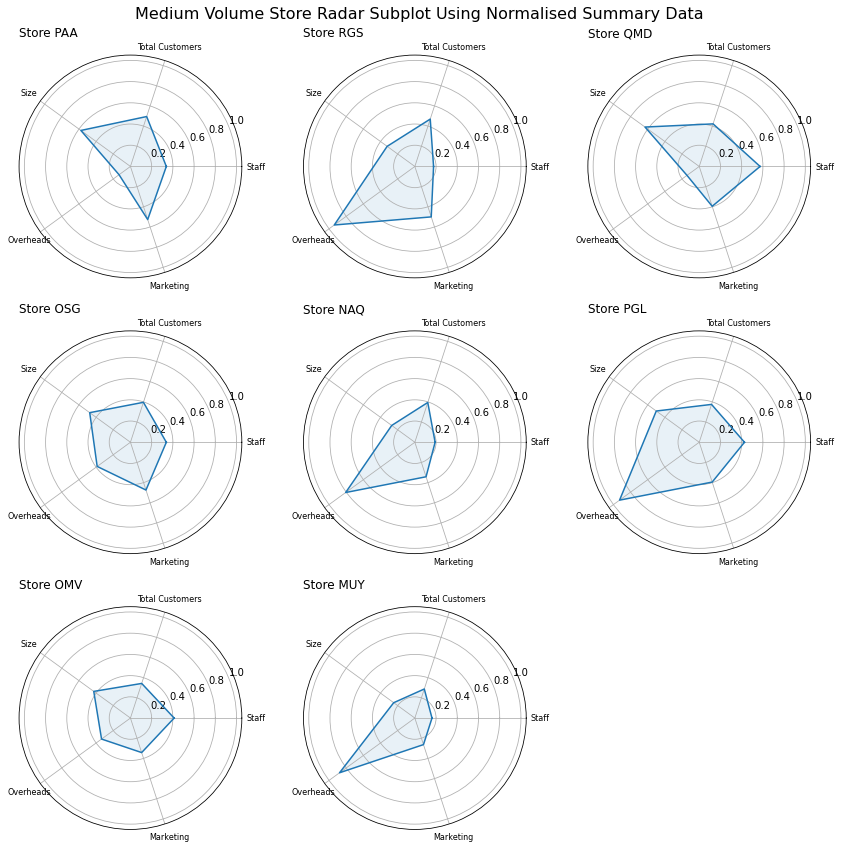

In [53]:
radarPlot(normalised_data, medium_volume, 3, 3, 
          "Medium Volume Store Radar Subplot Using Normalised Summary Data",
         "mediumVolRadarPlot", save_fig = True)

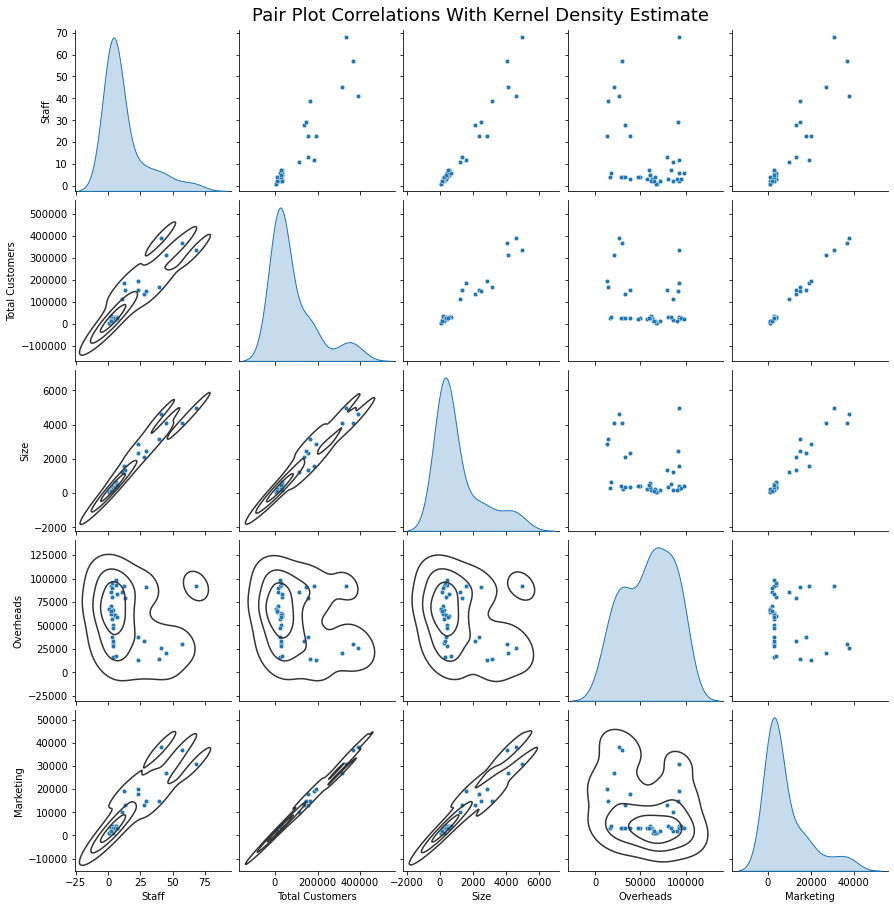

In [36]:
pp = sns.pairplot(summary_data, 
                 #height=1.5, 
                 plot_kws={'s': 20},
                  diag_kind="kde",
                 corner=False)
pp.map_lower(sns.kdeplot, #kernel density estimation
             levels=4, # number of "rings" to use
             color=".2") # colour
pp.fig.suptitle("Pair Plot Correlations With Kernel Density Estimate ",  
                y=1.01,
                x=0.535,
               fontsize = 18)
plt.savefig('%s/pairplot.png'%(PATH), transparent=True,bbox_inches='tight') 
plt.show()

In [37]:
print(summary_data.head())

     Staff  Total Customers  Size  Overheads  Marketing
RGS     12           183484  1597      92000      19000
RAH     41           390690  4601      26000      38000
TAP      6            29012   422      93000       4000
DTJ      4            24414   309      16000       3000
VYZ      3            24650   335      38000       3000


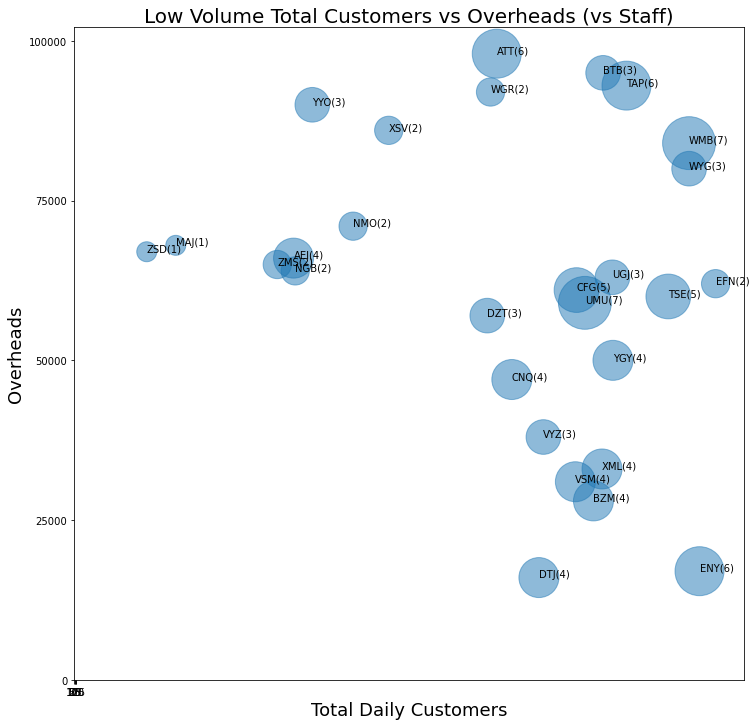

In [38]:
summary_data_bubble = summary_data.loc[low_volume]

summary_data_bubble['BubbleSize'] = summary_data['Staff'] * 400

plt.figure(figsize=(12, 12))
plt.scatter(summary_data_bubble['Total Customers'], 
            summary_data_bubble['Overheads'], 
            s=summary_data_bubble['BubbleSize'], alpha=0.5)
plt.xticks([25,50,75,100,125])
plt.yticks([0,25000,50000,75000,100000])
plt.title('Low Volume Total Customers vs Overheads (vs Staff)', fontsize=20)
plt.xlabel('Total Daily Customers', fontsize=18)
plt.ylabel('Overheads', fontsize=18)
for i, name in enumerate(summary_data_bubble.index):
    plt.annotate(name + "(" + str(format(summary_data_bubble["Staff"][i])) + ")", 
                 (summary_data_bubble['Total Customers'][i], 
                  summary_data_bubble['Overheads'][i]))
#plt.savefig('%s/low_vol_bubble_plot_AverageCustomerVsOverheadVsStaff.png'%(PATH), transparent=True, bbox_inches='tight')  
plt.show()

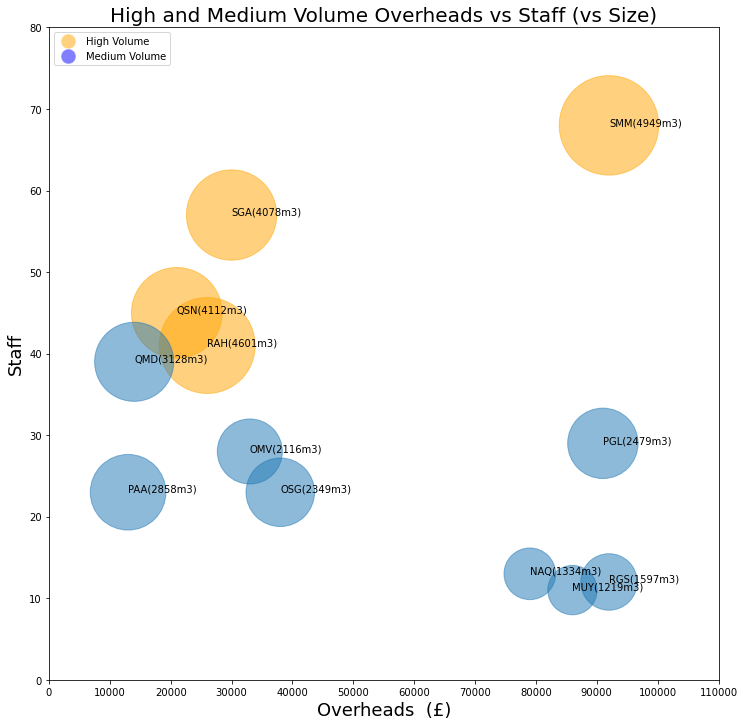

In [39]:
summary_data_bubble = summary_data.loc[high_volume]
summary_data_bubble_medium = summary_data.loc[medium_volume]
#summary_data_bubble['BubbleSize'] = summary_data['Staff'] * 20
summary_data_bubble['BubbleSize'] = summary_data['Size'] * 2
summary_data_bubble_medium['BubbleSize'] = summary_data['Size'] * 2
# custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='High Volume',
                          markerfacecolor='orange',alpha=0.5, markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Medium Volume',
                          markerfacecolor='blue',alpha=0.5, markersize=15)]

plt.figure(figsize=(12, 12))
plt.scatter(summary_data_bubble['Overheads'], 
            summary_data_bubble['Staff'], 
            s=summary_data_bubble['BubbleSize'], 
            color='orange',
            alpha=0.5)
plt.scatter(summary_data_bubble_medium['Overheads'], 
            summary_data_bubble_medium['Staff'], 
            s=summary_data_bubble_medium['BubbleSize'], 
            
            alpha=0.5)
#plt.scatter(summary_data_bubble['Overheads'], 
#            summary_data_bubble['Size'], 
#            s=summary_data_bubble['BubbleSize'], alpha=0.5)
plt.xticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000])
plt.yticks([0,10,20,30,40,50,60,70,80])
plt.title('High and Medium Volume Overheads vs Staff (vs Size)', fontsize=20)
plt.xlabel('Overheads  (£)', fontsize=18)
plt.ylabel('Staff', fontsize=18)
for i, name in enumerate(summary_data_bubble.index):
    plt.annotate(name + "(" + str(format(summary_data_bubble["Size"][i])) + "m3)", 
                 (summary_data_bubble['Overheads'][i], 
                  summary_data_bubble['Staff'][i]))
for i, name in enumerate(summary_data_bubble_medium.index):
    plt.annotate(name + "(" + str(format(summary_data_bubble_medium["Size"][i])) + "m3)", 
                 (summary_data_bubble_medium['Overheads'][i], 
                  summary_data_bubble_medium['Staff'][i]))
plt.legend(handles=legend_elements, loc='upper left')
plt.savefig('%s/high_med_vol_bubble_plot_OverheadvstaffVsize.png'%(PATH), transparent=True, bbox_inches='tight')  
plt.show()
plt.show()

In [40]:
x_min = 300
x_max = 1400
bin_width = 25
n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

plot = data[high_volume].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Visitors per day', ylabel='Frequency',
    title='Frequency for Daily High Volume Store Visits',
    alpha=0.5, muted_alpha=0.1, muted_fill_alpha=0.5, muted_line_alpha=0.5,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    bins=bins
)
hvplot.show(plot)

45 bins
Launching server at http://localhost:36075


intedractive bar graph showing frequency for visits per day to high volume stores

In [41]:
plot = data.corr().hvplot.heatmap(
    frame_height=500, frame_width=500,
    title='Interactive Customer Visit correlations',
    rot=90, cmap='coolwarm'  # see http://holoviews.org/user_guide/Colormaps.html
).opts(invert_yaxis=True, clim=(-1, 1))
hvplot.show(plot)

Launching server at http://localhost:38899


very strong correlation between ZMS and XSV with a value of 0.96952

### Box plot

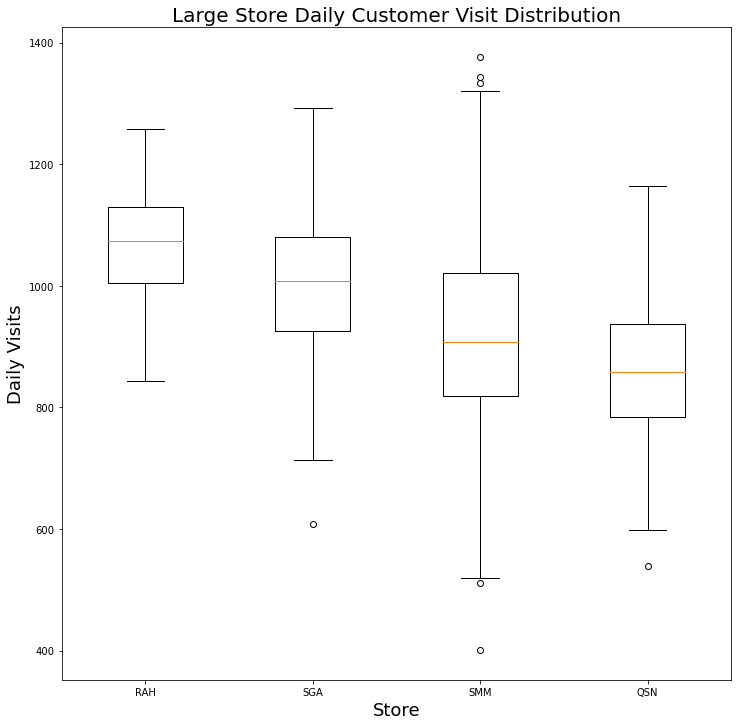

In [42]:
plt.figure(figsize=(12, 12))
#data[high_volume].boxplot()
plt.boxplot(data[high_volume], labels=high_volume)
plt.xlabel('Store', fontsize=18)
plt.ylabel('Daily Visits', fontsize=18)
plt.title('Large Store Daily Customer Visit Distribution', fontsize=20)
plt.savefig('%s/boxPlot_largeStore_daily_customer.png'%(PATH), transparent=True, bbox_inches='tight') 
plt.show()

### decompision 

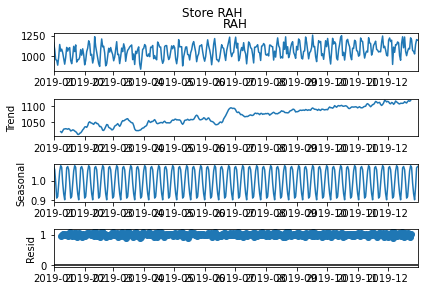

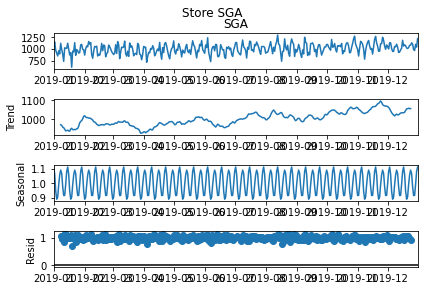

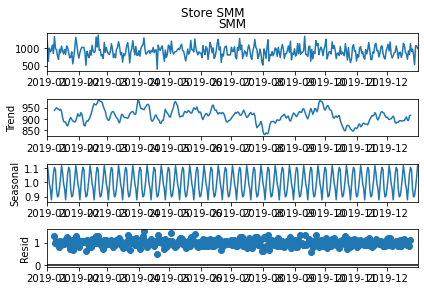

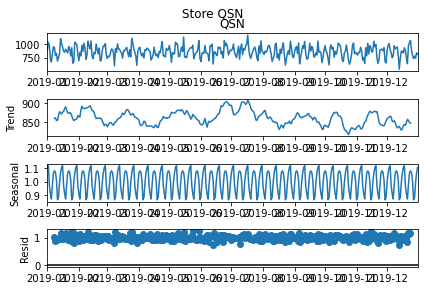

In [43]:
for name in high_volume:
    result = seasonal_decompose(data[name], model='multiplicative', period=14)
    result.plot()
    plt.suptitle('Store ' + name, position=(0.5, 1.0))
    plt.show()